## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

## Import the data

In [2]:
ds = pd.read_csv('diabetes.csv')

## Analyse the data

In [3]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


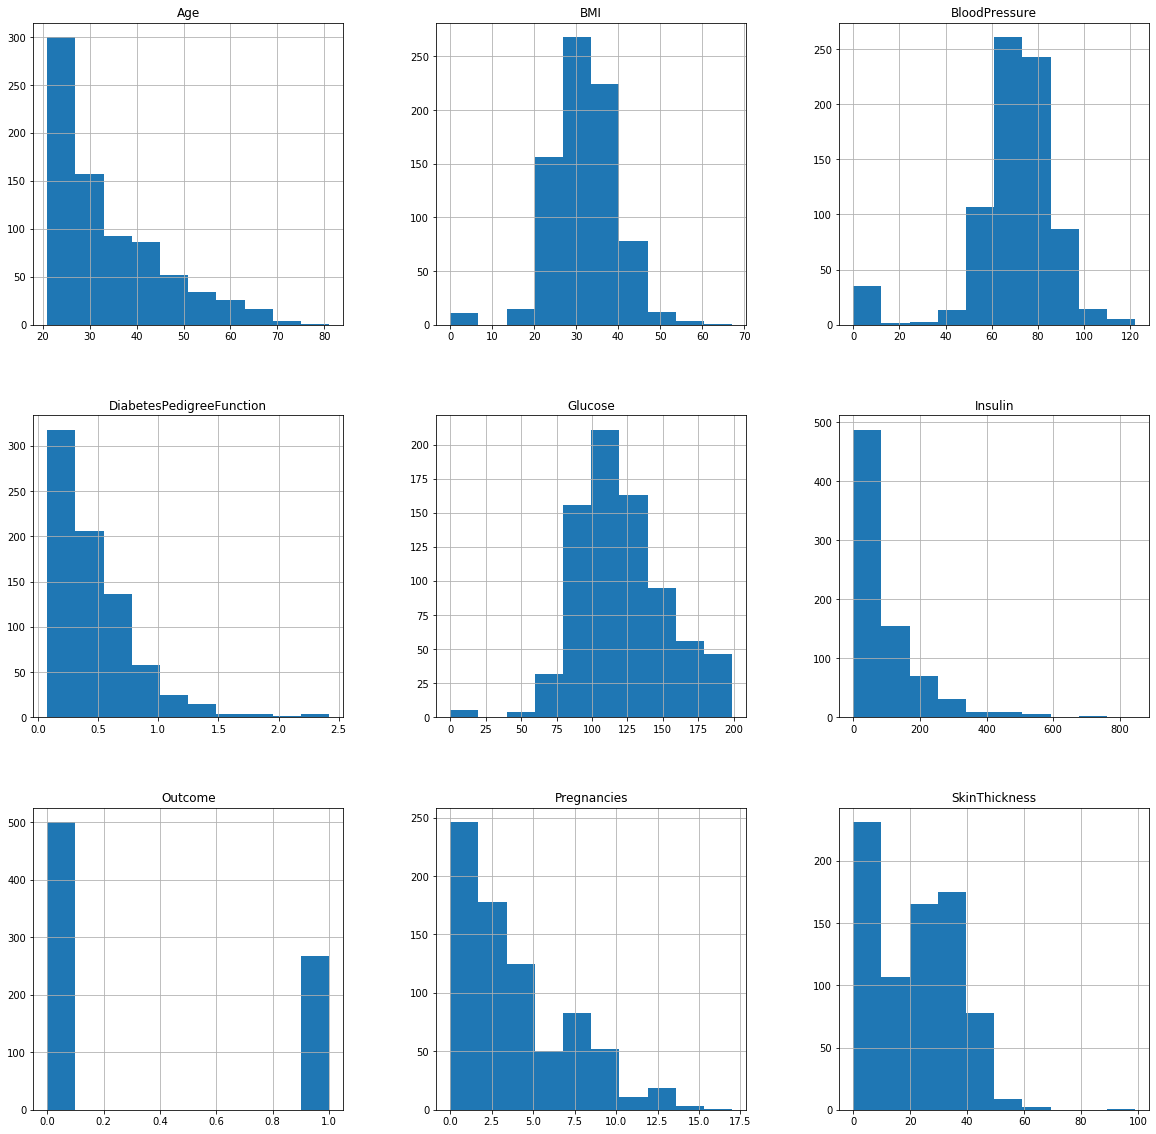

In [4]:
hist = ds.hist(figsize=(20,20))

## Split the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ds.drop(['Outcome'], axis=1),ds.Outcome)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((576, 8), (576,), (192, 8), (192,))

## Normalize the data

In [7]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM

## Preprocess, Train and Test a SVM Model with a polynomial kernel

### Find the best hyperparameters degree and C

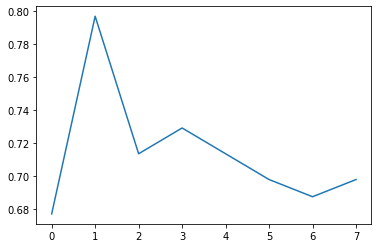

In [8]:
scores = []
degrees = list(map(lambda x: x, range(0,8)))
for deg in degrees:
    svc = svm.SVC(kernel='poly', degree=deg)
    svc.fit(X_train_scaled,y_train)
    scores.append(svc.score(X_test_scaled,y_test))
plt.plot(degrees, scores)
plt.show()

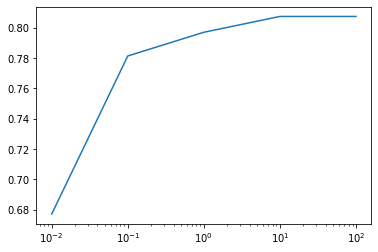

In [9]:
scores = []
Cs = list(map(lambda x: 10**x, range(-2,3)))
for c in Cs:
    svc = svm.SVC(kernel='poly', degree=1, C=c)
    svc.fit(X_train_scaled,y_train)
    scores.append(svc.score(X_test_scaled,y_test))
plt.semilogx(Cs, scores)
plt.show()

### Train and test

In [10]:
svc = svm.SVC(kernel='poly', degree=1, C=10)
svc.fit(X_train_scaled,y_train)
round(svc.score(X_test_scaled,y_test), 2)

0.81

## Preprocess, Train and Test a SVM Model with a rbf kernel

### Find the best hyperparameters C and gamma

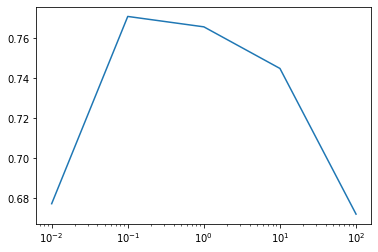

In [11]:
np.random.seed(0) 
scores = []
Cs = list(map(lambda x: 10**x, range(-2,3)))
for c in Cs:
    svc = svm.SVC(C=c)
    svc.fit(X_train_scaled,y_train)
    scores.append(svc.score(X_test_scaled,y_test))
plt.semilogx(Cs, scores)
plt.show()

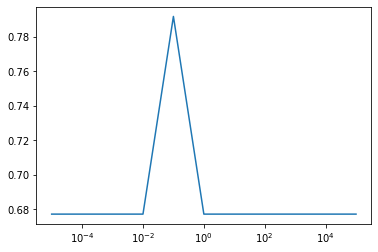

In [12]:
scores = []
gammas = list(map(lambda x: 10**x, range(-5,6)))
for gamma in gammas:
    svc = svm.SVC(C=0.1, gamma=gamma)
    svc.fit(X_train_scaled,y_train)
    scores.append(svc.score(X_test_scaled,y_test))
plt.semilogx(gammas, scores)
plt.show()

### Train and test

In [13]:
svc = svm.SVC(C=0.1, gamma=0.1)
svc.fit(X_train_scaled,y_train)
round(svc.score(X_test_scaled,y_test), 2)

0.79

# Naive Bayes

## Train and test the Gaussian Naive Bayes Model

In [14]:
np.random.seed(0) 
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print(gnb.score(X_test, y_test))

0.75


# KNN

## Find the best hyperparameter k

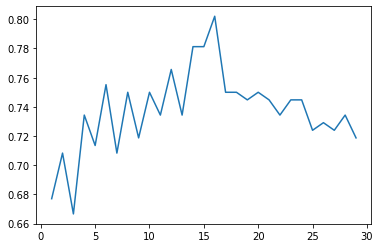

In [15]:
np.random.seed(0) 
scores = []
Ks = range(1,30)
for k in Ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.plot(Ks, scores)
plt.show()

## Train and test the K-Nearest Neigbors Model

In [16]:
np.random.seed(0) 
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
round(knn.score(X_test, y_test), 2)

0.8